In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [2]:
!ls | grep .csv

predict.csv
training.csv


In [16]:
train_df = pd.read_csv('training.csv')
pred_df = pd.read_csv('predict.csv')

In [17]:
train_df.head()

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank
0,175339,1.514050e+12,1.514050e+12,6.315242e+10,6.315242e+10,other,57727,space,0.99973,1,...,3089,viewed,male,0,0,1,other,1,0.23077,0.73677
1,175348,1.514110e+12,1.515160e+12,6.309278e+10,6.204696e+10,forum,111913,space,0.99977,0,...,44661,viewed,male,0,0,1,other,1,0.23077,0.78240
2,175353,1.514120e+12,1.515160e+12,6.309049e+10,6.204716e+10,forum,111913,space,0.99977,0,...,3080,viewed,male,0,0,1,marketing,1,0.23077,0.82125
3,175371,1.514190e+12,1.514190e+12,6.301324e+10,6.301324e+10,other,9037,space,0.99949,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61522
4,175372,1.514190e+12,1.514190e+12,6.301323e+10,6.301323e+10,other,9037,space,0.99949,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61522


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9418 entries, 0 to 9417
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9418 non-null   int64  
 1   posted_time                     9418 non-null   float64
 2   updated_time                    9418 non-null   float64
 3   age                             9418 non-null   float64
 4   updated_age                     9418 non-null   float64
 5   app_type                        9418 non-null   object 
 6   owner_id                        9418 non-null   int64  
 7   owner_type                      9418 non-null   object 
 8   owner_influence                 9418 non-null   float64
 9   number_of_likes                 9418 non-null   int64  
 10  number_of_comments              9418 non-null   int64  
 11  reactivity                      9418 non-null   float64
 12  is_mentions_me                  94

No 'Null' values. 

In [19]:
all_cols = [col for col in train_df.columns if col != 'rank']
num_cols = [col for col in all_cols if train_df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in all_cols if col not in num_cols]

print("Amount of number columns: {}".format(len(num_cols)))
print("Amount of categorical columns: {}".format(len(cat_cols)))

Amount of number columns: 52
Amount of categorical columns: 19


In [20]:
train_df[cat_cols].nunique()

app_type               6
owner_type             2
poster_gender          2
poster_focus           5
participant1_action    3
participant1_gender    2
participant1_focus     4
participant2_action    3
participant2_gender    2
participant2_focus     4
participant3_action    3
participant3_gender    2
participant3_focus     4
participant4_action    3
participant4_gender    2
participant4_focus     4
participant5_action    3
participant5_gender    2
participant5_focus     4
dtype: int64

We have a few different values in each column, so there is no need to create some complex embedding system.

Let's take a closer look on this values.

In [21]:
print("Unique values in every categorical column:", end="\n\n")
for col in cat_cols:
    print("{:19s} --> {}".format(col, train_df[col].unique()))

Unique values in every categorical column:

app_type            --> ['other' 'forum' 'wiki' 'calendar' 'poll' 'social']
owner_type          --> ['space' 'user']
poster_gender       --> ['male' 'female']
poster_focus        --> ['marketing' 'other' 'engineering' 'sales' 'none']
participant1_action --> ['liked' 'commented' 'viewed']
participant1_gender --> ['male' 'female']
participant1_focus  --> ['marketing' 'other' 'engineering' 'sales']
participant2_action --> ['viewed' 'commented' 'liked']
participant2_gender --> ['male' 'female']
participant2_focus  --> ['other' 'marketing' 'sales' 'engineering']
participant3_action --> ['viewed' 'commented' 'liked']
participant3_gender --> ['male' 'female']
participant3_focus  --> ['marketing' 'other' 'engineering' 'sales']
participant4_action --> ['viewed' 'liked' 'commented']
participant4_gender --> ['male' 'female']
participant4_focus  --> ['other' 'marketing' 'sales' 'engineering']
participant5_action --> ['viewed' 'liked' 'commented']
partici

### Plotting and exploring data

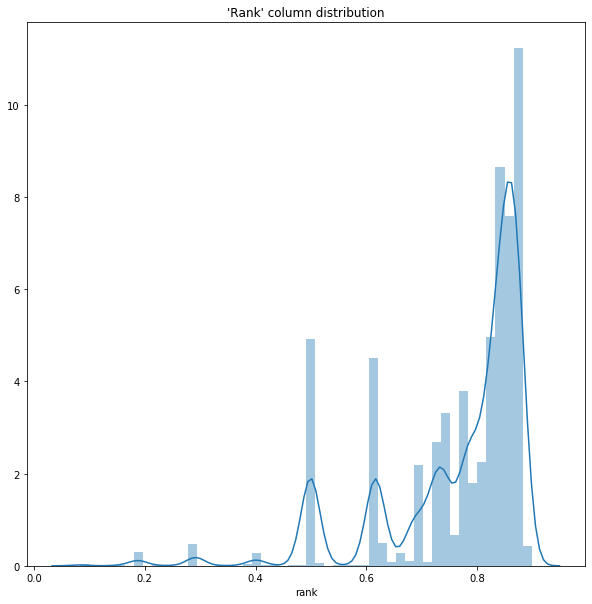

In [22]:
# Looking at label column.

plt.figure(figsize=(10, 10))
plt.title("'Rank' column distribution")

sns.distplot(train_df['rank'])

Not normal.

Also, some anomalies at 0.5 and 0.6 values.

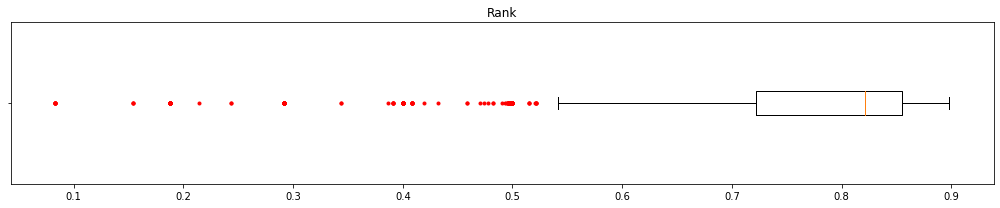

In [23]:
plt.figure(figsize=(14, 3))
plt.boxplot(x=train_df['rank'], vert=False, sym="r.")
plt.tick_params(labelleft=False)
plt.title('Rank')

plt.tight_layout()

Many outliers, but values are not 'impossible' to get.

In [29]:
# Get rid of redundant columns
redundant_cols = ['poster_is_employee', 'poster_is_lead', 'poster_order',
                  'participant1_is_employee', 'participant1_is_lead', 'participant1_order',
                  'participant2_is_employee', 'participant2_is_lead', 'participant2_order',
                  'participant3_is_employee', 'participant3_is_lead', 'participant3_order',
                  'participant4_is_employee', 'participant4_is_lead', 'participant4_order',
                  'participant5_is_employee', 'participant5_is_lead', 'participant5_order',
                  'id', 'participant1_id', 'participant2_id', 'participant3_id',
                  'participant4_id', 'participant5_id', 'owner_id', 'poster_id',
                  'posted_time', 'updated_time', 'age', 'updated_age']
useful_cols = [i for i in all_cols if i not in redundant_cols]

train_df = train_df[useful_cols]

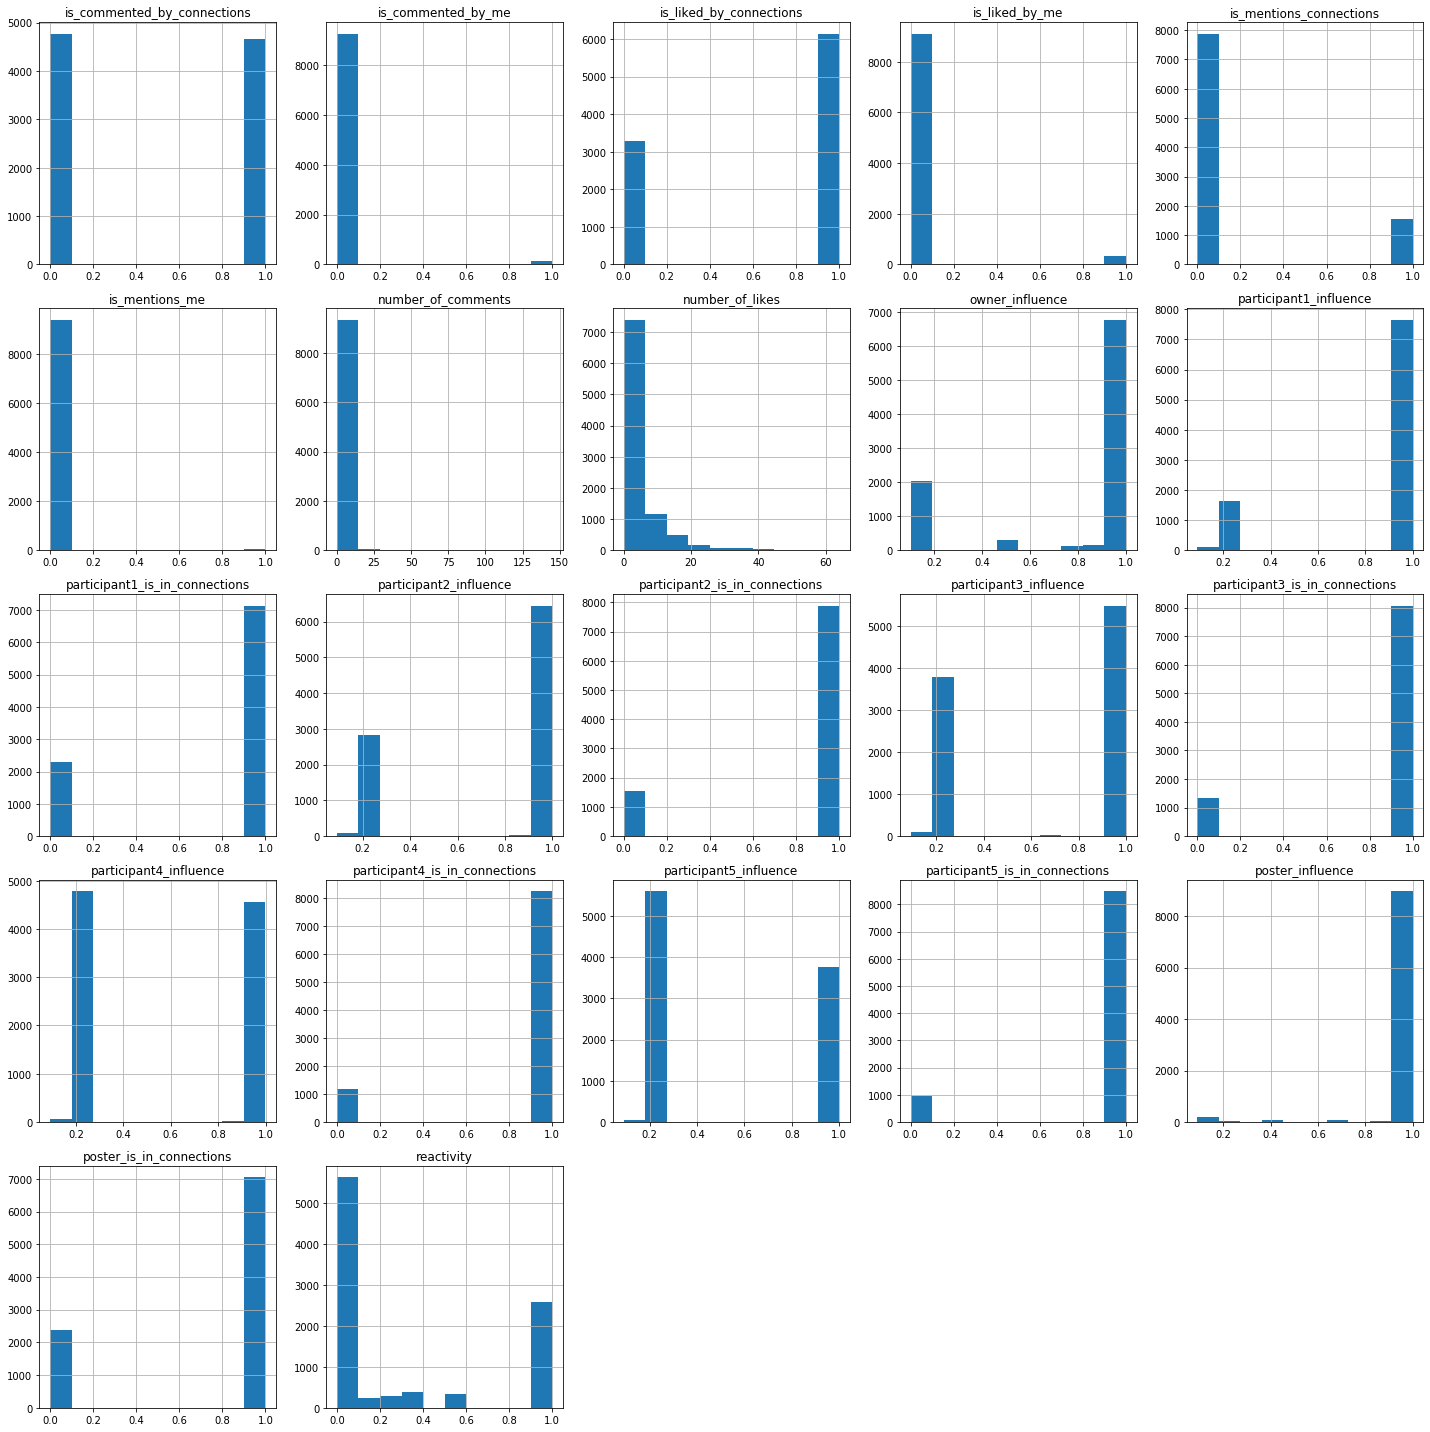

In [30]:
hist = train_df.hist(figsize=(20, 20))

plt.tight_layout()

In [46]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need 

In [53]:
# sns.pairplot(data=train_df, hue='poster_focus', diag_kws={'bw': 1.5})

#### Data Relationships

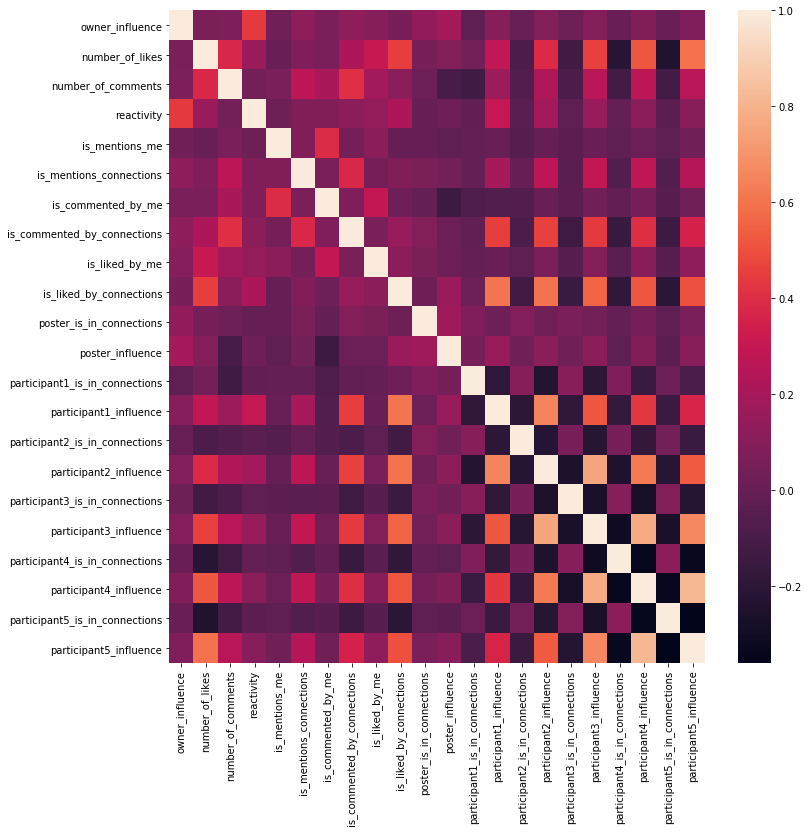

In [39]:
corr_df = train_df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_df, annot=False)

### Preprocessing

We have a problem regarding using Kmeans algorithm with our data. 

Such algorithm can't work with categorical data. Also I will try to use One Hot Encoding, but it also brings us some problem, especially with 'distances' between different categories.

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
all_cols = [col for col in train_df.columns] # if col != 'rank']
num_cols = [col for col in all_cols if train_df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in all_cols if col not in num_cols]

print("Amount of number columns: {}".format(len(num_cols)))
print("Amount of categorical columns: {}".format(len(cat_cols)))

Amount of number columns: 22
Amount of categorical columns: 19


In [42]:
train_df.head()

,app_type,owner_type,owner_influence,number_of_likes,number_of_comments,reactivity,is_mentions_me,is_mentions_connections,is_commented_by_me,is_commented_by_connections,...,participant4_action,participant4_gender,participant4_is_in_connections,participant4_focus,participant4_influence,participant5_action,participant5_gender,participant5_is_in_connections,participant5_focus,participant5_influence
0,other,space,0.99973,1,0,1.00000,0,0,0,0,...,viewed,male,1,other,0.23077,viewed,male,1,other,0.23077
1,forum,space,0.99977,0,2,0.12336,0,0,0,1,...,viewed,male,1,marketing,0.23077,viewed,male,1,other,0.23077
2,forum,space,0.99977,0,3,0.12336,0,0,0,1,...,viewed,male,1,other,0.23077,viewed,male,1,marketing,0.23077
3,other,space,0.99949,0,0,0.00000,0,0,0,0,...,viewed,male,1,other,0.23077,viewed,male,1,marketing,0.23077
4,other,space,0.99949,0,0,0.00000,0,0,0,0,...,viewed,male,1,other,0.23077,viewed,male,1,marketing,0.23077


In [41]:
encoder = OneHotEncoder(handle_unknown='ignore')

encoder.fit(train_df[cat_cols].to_numpy())
rez = encoder.transform(train_df[cat_cols].to_numpy())
rez_df = pd.DataFrame(rez.toarray())
    
rez_df.index = train_df.index

new_feature_names = encoder.get_feature_names(cat_cols)
rename_to_new = {old: new for old, new in zip(list(range(len(new_feature_names))), new_feature_names)}
rez_df = rez_df.rename(rename_to_new, axis=1)

rez_df.head()

,app_type_calendar,app_type_forum,app_type_other,app_type_poll,app_type_social,app_type_wiki,owner_type_space,owner_type_user,poster_gender_female,poster_gender_male,...,participant4_focus_sales,participant5_action_commented,participant5_action_liked,participant5_action_viewed,participant5_gender_female,participant5_gender_male,participant5_focus_engineering,participant5_focus_marketing,participant5_focus_other,participant5_focus_sales
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [43]:
train_enc_df = train_df.copy()
train_enc_df = train_enc_df.merge(rez_df, right_index=True, left_index=True, how='outer')
train_enc_df = train_enc_df.drop(cat_cols, axis=1)

train_enc_df.head()

,owner_influence,number_of_likes,number_of_comments,reactivity,is_mentions_me,is_mentions_connections,is_commented_by_me,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,...,participant4_focus_sales,participant5_action_commented,participant5_action_liked,participant5_action_viewed,participant5_gender_female,participant5_gender_male,participant5_focus_engineering,participant5_focus_marketing,participant5_focus_other,participant5_focus_sales
0,0.99973,1,0,1.00000,0,0,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.99977,0,2,0.12336,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.99977,0,3,0.12336,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.99949,0,0,0.00000,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.99949,0,0,0.00000,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


### Clustering

In [34]:
from sklearn.cluster import KMeans

In [35]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(train_df)
    inertia.append(np.sqrt(kmeans.inertia_))

ValueError: could not convert string to float: 'marketing'

In [ ]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');